<a href="https://colab.research.google.com/github/anouarkh3/patient-things/blob/main/patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [603]:
import pandas as pd # Library import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [604]:
df_pat = pd.read_csv('patients_new.csv')


In [605]:
df_pat.columns


Index(['Unnamed: 0', 'F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_stddevNorm',
       'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm', 'mfcc3_sma3_amean',
       'mfcc3_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_stddevNorm'],
      dtype='object')

In [606]:
df_pat = df_pat.drop(columns = ['Unnamed: 0'])

In [607]:
df_pat['target'] = ['patient'] * len(df_pat)

In [608]:
df_pat

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,loudness_sma3_amean,loudness_sma3_stddevNorm,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_stddevNorm,target
0,34.514202,0.232929,0.819241,0.988821,0.878618,1.344338,1.156416,13.127023,1.035955,12.599355,...,1.421749,0.880077,601.916321,0.417367,1234.417847,0.247063,952.383362,0.106325,0.612625,patient
1,33.393406,0.218617,0.509318,0.957057,0.440044,1.151958,0.983111,15.651409,1.047899,19.928337,...,1.572845,0.725496,648.679260,0.377578,1157.973145,0.241575,841.546326,0.106217,0.589766,patient
2,36.355198,0.194799,0.604569,1.109563,0.451689,1.365438,1.396050,11.929869,1.343641,7.693721,...,1.302912,0.829534,689.728516,0.473583,1255.237061,0.266905,997.392578,0.136056,0.442332,patient
3,33.150230,0.166384,0.753195,0.945784,0.714744,1.078660,0.920746,18.499468,0.705123,13.101238,...,1.407218,0.852320,636.408081,0.323817,1273.976196,0.207727,969.874939,0.104170,0.410083,patient
4,39.982841,0.182613,0.497613,1.429944,0.384590,1.519118,1.958761,7.642491,2.217459,14.549698,...,1.279176,0.655133,677.473877,0.556124,1093.736450,0.261003,802.580566,0.142103,0.406497,patient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,39.883892,0.154984,0.425332,1.079655,0.320286,1.262993,1.787655,14.437132,1.125279,17.805212,...,1.321828,0.880984,694.271667,0.515544,1124.120850,0.262999,884.749939,0.119379,0.571407,patient
151,38.303596,0.189212,0.969896,0.840410,0.823759,1.118194,1.605992,4.471805,3.640945,-1.981983,...,1.528691,0.624995,659.401062,0.409077,1170.104492,0.309414,901.636047,0.126813,0.486240,patient
152,34.686913,0.141565,1.173876,0.927903,1.049792,1.032131,1.084616,15.832133,1.110304,12.102921,...,1.105986,0.816782,617.535583,0.382224,1218.608643,0.237447,849.816833,0.104748,0.566658,patient
153,36.158764,0.185819,1.104017,0.976277,1.241379,1.206194,1.109530,2.905239,4.654803,17.213234,...,1.543229,0.736943,602.609863,0.393974,1146.744263,0.276526,818.412659,0.099474,0.507766,patient


In [609]:
df_con = pd.read_csv('control_new.csv')


In [610]:
df_con = df_con.drop(columns = ['Unnamed: 0'])

In [611]:
df_con['target'] = ['control'] * len(df_con)

In [612]:
df_con

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,loudness_sma3_amean,loudness_sma3_stddevNorm,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_stddevNorm,target
0,38.795219,0.179832,1.720902,0.891856,1.864253,1.119125,0.841761,-11.488132,-1.683556,4.742245,...,1.525916,0.687725,713.125854,0.387791,1163.275513,0.304604,913.386292,0.117538,0.538492,control
1,36.207413,0.186880,0.647873,0.694064,0.399547,0.985078,1.243443,13.112325,1.255048,8.122087,...,1.317871,0.798483,649.816833,0.376612,1161.644409,0.274652,828.321594,0.109945,0.647653,control
2,39.551331,0.184529,1.454481,0.938412,1.616275,1.193722,1.113200,-5.479738,-3.358514,2.435162,...,1.514753,0.652057,740.726013,0.338579,1206.984253,0.316010,948.314087,0.116750,0.582221,control
3,34.303932,0.276783,1.181428,0.983187,0.864277,1.040217,1.567121,1.423996,9.004633,14.162606,...,1.395725,0.796595,665.829651,0.604510,1082.899658,0.312493,869.421265,0.139099,0.470111,control
4,32.246933,0.142848,0.437876,0.792960,0.321946,1.067969,0.835712,18.326864,0.717175,8.430658,...,1.273842,0.950279,640.609985,0.334577,1246.524902,0.212769,976.247803,0.112109,0.397443,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,34.507988,0.267102,1.341372,0.835802,1.521541,1.085511,1.140942,-8.206750,-2.163105,4.812872,...,1.914577,0.622207,655.524109,0.456546,1193.745850,0.287099,897.805359,0.127315,0.497670,control
151,33.963573,0.262463,0.935504,0.847212,1.041354,1.236536,0.973114,9.750354,1.824072,10.945920,...,1.692344,0.749849,669.456970,0.383507,1195.558105,0.275053,988.103210,0.112494,0.515323,control
152,35.389187,0.168895,0.624486,0.841162,0.493213,1.036713,1.007140,10.158144,1.660060,0.174769,...,1.434409,0.836562,653.750854,0.352578,1267.596191,0.224781,1045.604858,0.123505,0.405057,control
153,33.495243,0.263251,0.881489,0.747840,1.046347,1.060802,0.944373,18.065525,0.910619,10.532577,...,1.646209,0.870801,682.454956,0.291026,1154.991943,0.258561,812.539429,0.095939,0.500339,control


In [613]:
df_merged = pd.concat([df_pat, df_con], axis=0, ignore_index=True)

In [614]:
df_merged

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,loudness_sma3_amean,loudness_sma3_stddevNorm,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_stddevNorm,target
0,34.514202,0.232929,0.819241,0.988821,0.878618,1.344338,1.156416,13.127023,1.035955,12.599355,...,1.421749,0.880077,601.916321,0.417367,1234.417847,0.247063,952.383362,0.106325,0.612625,patient
1,33.393406,0.218617,0.509318,0.957057,0.440044,1.151958,0.983111,15.651409,1.047899,19.928337,...,1.572845,0.725496,648.679260,0.377578,1157.973145,0.241575,841.546326,0.106217,0.589766,patient
2,36.355198,0.194799,0.604569,1.109563,0.451689,1.365438,1.396050,11.929869,1.343641,7.693721,...,1.302912,0.829534,689.728516,0.473583,1255.237061,0.266905,997.392578,0.136056,0.442332,patient
3,33.150230,0.166384,0.753195,0.945784,0.714744,1.078660,0.920746,18.499468,0.705123,13.101238,...,1.407218,0.852320,636.408081,0.323817,1273.976196,0.207727,969.874939,0.104170,0.410083,patient
4,39.982841,0.182613,0.497613,1.429944,0.384590,1.519118,1.958761,7.642491,2.217459,14.549698,...,1.279176,0.655133,677.473877,0.556124,1093.736450,0.261003,802.580566,0.142103,0.406497,patient
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,34.507988,0.267102,1.341372,0.835802,1.521541,1.085511,1.140942,-8.206750,-2.163105,4.812872,...,1.914577,0.622207,655.524109,0.456546,1193.745850,0.287099,897.805359,0.127315,0.497670,control
306,33.963573,0.262463,0.935504,0.847212,1.041354,1.236536,0.973114,9.750354,1.824072,10.945920,...,1.692344,0.749849,669.456970,0.383507,1195.558105,0.275053,988.103210,0.112494,0.515323,control
307,35.389187,0.168895,0.624486,0.841162,0.493213,1.036713,1.007140,10.158144,1.660060,0.174769,...,1.434409,0.836562,653.750854,0.352578,1267.596191,0.224781,1045.604858,0.123505,0.405057,control
308,33.495243,0.263251,0.881489,0.747840,1.046347,1.060802,0.944373,18.065525,0.910619,10.532577,...,1.646209,0.870801,682.454956,0.291026,1154.991943,0.258561,812.539429,0.095939,0.500339,control


In [615]:
x = df_merged.drop(columns = ['target'])


In [616]:
normalizer = StandardScaler()
normalizer.fit(x)

StandardScaler()

In [617]:
scaled_features = normalizer.transform(x)

In [618]:
x = pd.DataFrame(scaled_features, index=x.index, columns=x.columns)
x

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,loudness_sma3_amean,loudness_sma3_stddevNorm,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,...,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_stddevNorm
0,0.130373,0.396360,-0.318223,0.340569,0.079040,1.028077,0.273105,0.584289,-0.009584,0.444442,...,-0.180600,0.014423,0.638473,-0.597907,0.192237,0.472289,-0.239129,0.414859,-0.695427,1.693523
1,-0.148128,0.138092,-1.307414,0.138514,-1.184794,-0.069871,-0.303930,0.954118,-0.008417,1.590769,...,-0.166693,0.719169,-0.988773,0.248094,-0.326211,-0.877210,-0.411869,-1.291118,-0.702432,1.385967
2,0.587832,-0.291702,-1.003397,1.108635,-1.151238,1.148498,1.070983,0.408902,0.020481,-0.322848,...,1.293086,-0.539860,0.106415,0.990727,0.924723,0.839816,0.385451,1.107631,1.231560,-0.597673
3,-0.208553,-0.804463,-0.529022,0.066804,-0.393195,-0.488195,-0.511578,1.371366,-0.041910,0.522942,...,0.375170,-0.053354,0.346275,0.026093,-1.026728,1.170623,-1.477332,0.684086,-0.835144,-1.031561
4,1.489246,-0.511604,-1.344775,3.146645,-1.344596,2.025571,2.944572,-0.219210,0.105865,0.749496,...,0.058612,-0.650571,-1.729465,0.769025,2.000235,-2.011198,0.199663,-1.890870,1.623524,-1.079814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.128829,1.013034,1.348284,-0.632815,1.931743,-0.449093,0.221583,-2.541165,-0.322174,-0.773442,...,-2.295084,2.313084,-2.076071,0.371926,0.702736,-0.245705,1.021094,-0.425193,0.665011,0.146876
306,-0.006450,0.929312,0.052860,-0.560236,0.547994,0.412833,-0.337213,0.089598,0.067426,0.185829,...,-0.935853,1.276537,-0.732407,0.623989,-0.248965,-0.213713,0.641902,0.964651,-0.295603,0.384386
307,0.347793,-0.759162,-0.939828,-0.598720,-1.031578,-0.727590,-0.223921,0.149340,0.051400,-1.498888,...,-0.454658,0.073471,0.180400,0.339845,-0.651962,1.057995,-0.940522,1.849703,0.418071,-1.099186
308,-0.122823,0.943546,-0.119541,-1.192361,0.562382,-0.590112,-0.432912,1.307792,-0.021831,0.121178,...,-1.209266,1.061352,0.540823,0.859139,-1.453991,-0.929838,0.122803,-1.737586,-1.368590,0.182781


In [619]:
import pandas as pd
import numpy as np


In [620]:
x.corr()
corr = x.corr()
corr.style.background_gradient(cmap='coolwarm')



,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,loudness_sma3_amean,loudness_sma3_stddevNorm,spectralFlux_sma3_amean,spectralFlux_sma3_stddevNorm,mfcc1_sma3_stddevNorm,mfcc2_sma3_amean,mfcc2_sma3_stddevNorm,mfcc3_sma3_amean,mfcc3_sma3_stddevNorm,jitterLocal_sma3nz_amean,jitterLocal_sma3nz_stddevNorm,shimmerLocaldB_sma3nz_amean,shimmerLocaldB_sma3nz_stddevNorm,F1frequency_sma3nz_amean,F1frequency_sma3nz_stddevNorm,F1bandwidth_sma3nz_amean,F1bandwidth_sma3nz_stddevNorm,F2bandwidth_sma3nz_amean,F3frequency_sma3nz_stddevNorm,F3bandwidth_sma3nz_stddevNorm
F0semitoneFrom27.5Hz_sma3nz_amean,1.000000,-0.640130,0.035159,0.110341,-0.069854,0.277061,0.363470,-0.331211,-0.047022,-0.371922,-0.003150,-0.266791,0.100849,-0.486857,-0.072667,0.635363,-0.063097,-0.353313,0.400829,-0.397330,-0.183365,0.177598
F0semitoneFrom27.5Hz_sma3nz_stddevNorm,-0.640130,1.000000,0.135467,-0.146989,0.230678,-0.257706,0.030254,-0.014871,0.010083,0.211347,-0.001971,0.635985,-0.490523,0.623767,-0.204716,-0.294819,0.380500,0.007883,0.096037,0.202076,0.326080,-0.019989
loudness_sma3_amean,0.035159,0.135467,1.000000,-0.456237,0.882752,-0.569588,-0.083520,-0.444656,-0.035514,0.009081,-0.089756,0.181359,-0.193988,-0.038439,-0.074066,-0.180834,0.362799,-0.255809,0.398041,-0.310391,0.015189,0.311407
loudness_sma3_stddevNorm,0.110341,-0.146989,-0.456237,1.000000,-0.323336,0.847539,0.375462,-0.024192,0.016334,0.059156,0.018767,-0.085904,0.135507,0.124715,-0.200450,0.187318,-0.027258,0.125986,-0.141104,0.113402,-0.014214,-0.074219
spectralFlux_sma3_amean,-0.069854,0.230678,0.882752,-0.323336,1.000000,-0.412213,-0.173605,-0.417053,-0.096913,0.033877,-0.088895,0.411544,-0.340309,0.292870,-0.232924,-0.074829,0.170232,-0.093359,0.266262,-0.112362,-0.063374,0.148919
spectralFlux_sma3_stddevNorm,0.277061,-0.257706,-0.569588,0.847539,-0.412213,1.000000,0.317324,-0.020777,-0.029402,-0.099933,0.003778,-0.095292,0.132802,0.077884,-0.109068,0.362321,-0.204472,0.111112,-0.100809,0.114702,-0.074646,-0.096388
mfcc1_sma3_stddevNorm,0.363470,0.030254,-0.083520,0.375462,-0.173605,0.317324,1.000000,-0.012254,0.003802,-0.030284,0.000221,-0.116793,-0.028956,-0.104092,-0.205738,0.195174,0.533885,-0.474610,0.445329,-0.328989,0.265643,0.194820
mfcc2_sma3_amean,-0.331211,-0.014871,-0.444656,-0.024192,-0.417053,-0.020777,-0.012254,1.000000,0.068836,0.257681,0.104694,-0.288538,0.429927,-0.166425,0.424608,-0.247862,-0.274324,0.125346,-0.571322,0.113822,-0.167945,-0.136864
mfcc2_sma3_stddevNorm,-0.047022,0.010083,-0.035514,0.016334,-0.096913,-0.029402,0.003802,0.068836,1.000000,0.140423,0.008522,-0.051540,0.075211,-0.083751,0.148313,-0.057636,0.071734,-0.009133,-0.095308,-0.057113,-0.035032,0.109185
mfcc3_sma3_amean,-0.371922,0.211347,0.009081,0.059156,0.033877,-0.099933,-0.030284,0.257681,0.140423,1.000000,0.081583,-0.116725,0.200661,0.011253,0.263112,-0.459640,0.319115,-0.239972,-0.069967,-0.104591,0.050497,0.051276


In [621]:
x.columns

Index(['F0semitoneFrom27.5Hz_sma3nz_amean',
       'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'loudness_sma3_amean',
       'loudness_sma3_stddevNorm', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_stddevNorm',
       'mfcc2_sma3_amean', 'mfcc2_sma3_stddevNorm', 'mfcc3_sma3_amean',
       'mfcc3_sma3_stddevNorm', 'jitterLocal_sma3nz_amean',
       'jitterLocal_sma3nz_stddevNorm', 'shimmerLocaldB_sma3nz_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'F1frequency_sma3nz_amean',
       'F1frequency_sma3nz_stddevNorm', 'F1bandwidth_sma3nz_amean',
       'F1bandwidth_sma3nz_stddevNorm', 'F2bandwidth_sma3nz_amean',
       'F3frequency_sma3nz_stddevNorm', 'F3bandwidth_sma3nz_stddevNorm'],
      dtype='object')

In [622]:
x=x.drop(columns = ['spectralFlux_sma3_amean','spectralFlux_sma3_stddevNorm','F1bandwidth_sma3nz_stddevNorm','F1bandwidth_sma3nz_amean','shimmerLocaldB_sma3nz_amean','shimmerLocaldB_sma3nz_stddevNorm'])

In [623]:
y = df_merged['target']

In [624]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, stratify=y)


In [625]:
#x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size = 0.75, stratify=y_test

In [626]:
print(f'train size={len(y_train)},val size={len(y_val)} test size ={len(y_test)}')

train size=207,val size=31 test size =103


In [627]:
lr = LogisticRegression()


In [628]:
lr.fit(x_train, y_train)


LogisticRegression()

In [629]:
y_pred = lr.predict(x_test)


In [630]:
metrics.accuracy_score(y_test, y_pred)

0.8737864077669902

In [631]:
from sklearn.metrics import classification_report

In [632]:
report = classification_report(y_test, y_pred, target_names=['patient', 'control'])
print(report)

              precision    recall  f1-score   support

     patient       0.85      0.90      0.88        51
     control       0.90      0.85      0.87        52

    accuracy                           0.87       103
   macro avg       0.87      0.87      0.87       103
weighted avg       0.88      0.87      0.87       103



In [633]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

In [634]:
rf.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=10,
                       n_estimators=700, n_jobs=-1, oob_score=True,
                       random_state=1)

In [635]:
y_pred_rf = rf.predict(x_test)


In [636]:
metrics.accuracy_score(y_test, y_pred_rf)


0.9320388349514563

In [637]:
rf = RandomForestClassifier()
hyperparams = {
    'n_estimators': [5, 25, 100, 200],
    'max_depth': [12, 24, 48, None]
}

cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12, 24, 48, None],
                         'n_estimators': [5, 25, 100, 200]})

In [638]:
def results(results):
    print(f'Optimal Hyperparams: {results.best_params_}')
    mean = results.cv_results_['mean_test_score']

    for mean, params in zip(mean, results.cv_results_['params']):
        print(f'Recall {round(mean, 3)}, Hyperparameters {params}')

In [639]:
results(cross_val)


Optimal Hyperparams: {'max_depth': 48, 'n_estimators': 100}
Recall 0.759, Hyperparameters {'max_depth': 12, 'n_estimators': 5}
Recall 0.826, Hyperparameters {'max_depth': 12, 'n_estimators': 25}
Recall 0.855, Hyperparameters {'max_depth': 12, 'n_estimators': 100}
Recall 0.85, Hyperparameters {'max_depth': 12, 'n_estimators': 200}
Recall 0.774, Hyperparameters {'max_depth': 24, 'n_estimators': 5}
Recall 0.841, Hyperparameters {'max_depth': 24, 'n_estimators': 25}
Recall 0.865, Hyperparameters {'max_depth': 24, 'n_estimators': 100}
Recall 0.85, Hyperparameters {'max_depth': 24, 'n_estimators': 200}
Recall 0.787, Hyperparameters {'max_depth': 48, 'n_estimators': 5}
Recall 0.826, Hyperparameters {'max_depth': 48, 'n_estimators': 25}
Recall 0.875, Hyperparameters {'max_depth': 48, 'n_estimators': 100}
Recall 0.841, Hyperparameters {'max_depth': 48, 'n_estimators': 200}
Recall 0.797, Hyperparameters {'max_depth': None, 'n_estimators': 5}
Recall 0.826, Hyperparameters {'max_depth': None, 'n_e

In [640]:
rf1 = RandomForestClassifier(n_estimators=200, max_depth=48)
rf2 = RandomForestClassifier(n_estimators=200, max_depth=12)
rf3 = RandomForestClassifier(n_estimators=25, max_depth=None)

clf = [rf1, rf2, rf3]
lab = ['rf1', 'rf2', 'rf3']

for clf, lab in zip(clf, lab):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    report = classification_report(y_test, y_pred, target_names=['patient', 'control'])
    print(clf, '\n', report)
    #joblib.dump(clf, lab)

RandomForestClassifier(max_depth=48, n_estimators=200) 
               precision    recall  f1-score   support

     patient       0.91      0.98      0.94        51
     control       0.98      0.90      0.94        52

    accuracy                           0.94       103
   macro avg       0.94      0.94      0.94       103
weighted avg       0.94      0.94      0.94       103

RandomForestClassifier(max_depth=12, n_estimators=200) 
               precision    recall  f1-score   support

     patient       0.88      1.00      0.94        51
     control       1.00      0.87      0.93        52

    accuracy                           0.93       103
   macro avg       0.94      0.93      0.93       103
weighted avg       0.94      0.93      0.93       103

RandomForestClassifier(n_estimators=25) 
               precision    recall  f1-score   support

     patient       0.88      1.00      0.94        51
     control       1.00      0.87      0.93        52

    accuracy              

In [641]:
!pip install shap

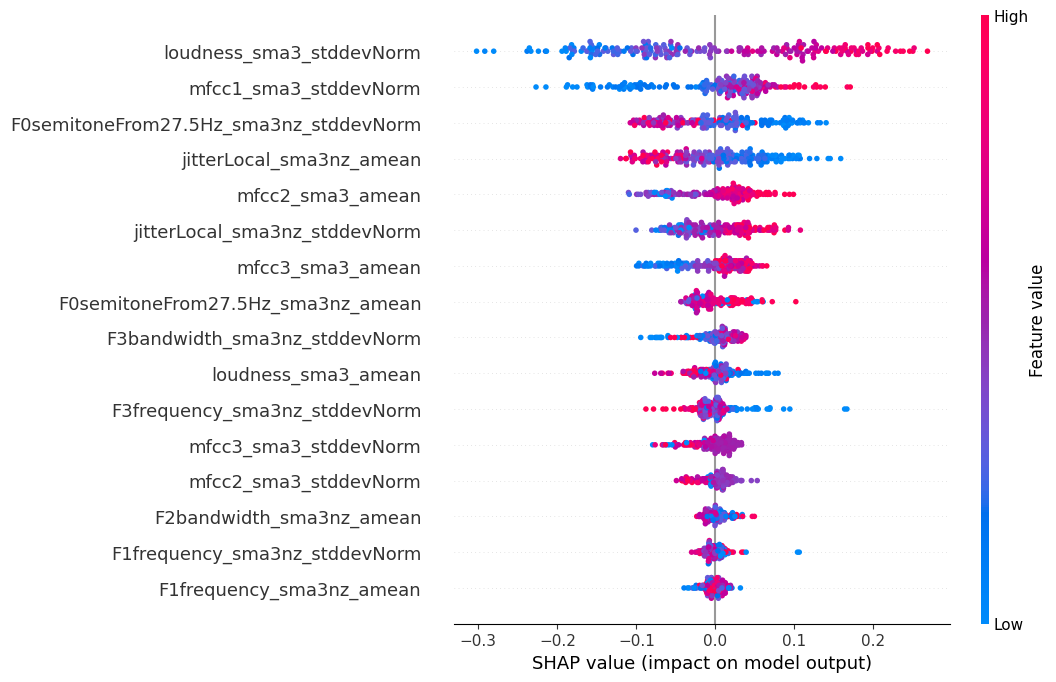

In [654]:
import shap
from shap.plots import beeswarm
explainer = shap.Explainer(rf1)
shap_values = explainer(x_train)
sv = explainer(x_train)
#beeswarm(sv[:,:,1])
shap.plots.beeswarm(sv[:,:,1], max_display=17)


In [643]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn. model_selection import cross_val_score
from numpy import mean

In [644]:
dec_tree = tree.DecisionTreeClassifier()

In [645]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [646]:
parameters = dict(dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)

In [647]:
hyperparams = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12]
}

cross_val = GridSearchCV(dec_tree, hyperparams, cv=5)
cross_val.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]})

In [648]:
def results(results):
    print(f'Optimal Hyperparams: {results.best_params_}')
    mean = results.cv_results_['mean_test_score']

    for mean, params in zip(mean, results.cv_results_['params']):
     print(f'Recall {round(mean, 3)}, Hyperparameters {params}')

In [649]:
results(cross_val)

Optimal Hyperparams: {'criterion': 'gini', 'max_depth': 10}
Recall 0.643, Hyperparameters {'criterion': 'gini', 'max_depth': 2}
Recall 0.778, Hyperparameters {'criterion': 'gini', 'max_depth': 4}
Recall 0.773, Hyperparameters {'criterion': 'gini', 'max_depth': 6}
Recall 0.782, Hyperparameters {'criterion': 'gini', 'max_depth': 8}
Recall 0.782, Hyperparameters {'criterion': 'gini', 'max_depth': 10}
Recall 0.773, Hyperparameters {'criterion': 'gini', 'max_depth': 12}
Recall 0.643, Hyperparameters {'criterion': 'entropy', 'max_depth': 2}
Recall 0.72, Hyperparameters {'criterion': 'entropy', 'max_depth': 4}
Recall 0.729, Hyperparameters {'criterion': 'entropy', 'max_depth': 6}
Recall 0.729, Hyperparameters {'criterion': 'entropy', 'max_depth': 8}
Recall 0.705, Hyperparameters {'criterion': 'entropy', 'max_depth': 10}
Recall 0.729, Hyperparameters {'criterion': 'entropy', 'max_depth': 12}


In [650]:
dec_tree1 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)
dec_tree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
dec_tree3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)

clf = [dec_tree1, dec_tree2, dec_tree3]
lab = ['dec_tree1', 'dec_tree2', 'dec_tree3']

for clf, lab in zip(clf, lab):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    report = classification_report(y_test, y_pred, target_names=['patient', 'control'])
    print(clf, '\n', report)
    #joblib.dump(clf, lab)


DecisionTreeClassifier(criterion='entropy', max_depth=12) 
               precision    recall  f1-score   support

     patient       0.86      0.86      0.86        51
     control       0.87      0.87      0.87        52

    accuracy                           0.86       103
   macro avg       0.86      0.86      0.86       103
weighted avg       0.86      0.86      0.86       103

DecisionTreeClassifier(criterion='entropy', max_depth=10) 
               precision    recall  f1-score   support

     patient       0.86      0.84      0.85        51
     control       0.85      0.87      0.86        52

    accuracy                           0.85       103
   macro avg       0.85      0.85      0.85       103
weighted avg       0.85      0.85      0.85       103

DecisionTreeClassifier(criterion='entropy', max_depth=6) 
               precision    recall  f1-score   support

     patient       0.82      0.82      0.82        51
     control       0.83      0.83      0.83        52

   

In [651]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [652]:
y_pred_clf = clf.predict(x_test)

In [653]:
report = classification_report(y_test, y_pred_clf, target_names=['patient', 'control'])
print(report)

              precision    recall  f1-score   support

     patient       0.83      0.84      0.83        51
     control       0.84      0.83      0.83        52

    accuracy                           0.83       103
   macro avg       0.84      0.84      0.83       103
weighted avg       0.84      0.83      0.83       103

